# Project: Investigate a Dataset of Movie reviews posted on TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
## Introduction
  #### To perform data analysis process I have taken a data from TMDB records. This dataset contain 21 columns and 10866 rows. These dataset comprises of the records like rating movie have,popularity it had gained, budget it has spent and revenue it has gained and many more. 
 
## Questions
<ul>
    <li>How many movie has been realesed every year? </li>
    <li>Which movie has the highest and the lowest profit ?</li>
    <li>Which movie has the highest and lowest popularity based on year? </li>
    <li>Which movie has the longest runtime?</li>
    <li>Is movie industry becoming profitable everyyear?  </li>
    <li>Is rating of the movie increasing as per the time?</li>
</ul>


Loaded the libary to import the dataset and to visualize the dataset to perform detail analysis

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Loaded the csv files using the pandas library

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')

Printed the 5 rows from the dataset to understand the data 

In [3]:
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


used the librabry to understand the basic statstical record of the data 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


used the library to findout the summary of the data like its datatype, non null value in the column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Determined to find out the total number of rows and columns in the data set

In [6]:
df.shape

(10866, 21)

### Data Cleaning (Replace this with more specific notes!)
<ul>
    <li>Checked for any duplicate records</li>
    <li>If there are any duplicate data drop it.</li>
    <li>Drop the column that we will not be utilizing on analysis</li>
    <li>Rename the column</li>
    <li>Convert the dataype so that column can display in number rather than scientific exponential number</li>
</ul

In [7]:
#Determing the number of rows that has duplicate records
df.duplicated().sum()

1

In [8]:
#dropping the duplicate recors
df.drop_duplicates(inplace=True)

In [9]:
#determing the dimesnison of table after dropping duplicated records
df.shape

(10865, 21)

In [10]:
#dropping the unnecessary column
df.drop(['imdb_id','cast','homepage','director','tagline','overview','production_companies','keywords','genres'],axis=1,inplace=True)

In [11]:
#Renaming the column name
df=df.rename(columns={'original_title':'Title','release_date':'ReleaseDate','vote_count':'VoteCount','vote_average':'VoteAverage','release_year':'ReleaseYear','budget_adj':'BudgetAdj','revenue_adj':'RevenueAdj'})

In [12]:
#changing the datatype
df['BudgetAdj']=df['BudgetAdj'].astype(int)
df['RevenueAdj']=df['RevenueAdj'].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the data, now we will dive deeper into the cleaned dataset to findout the message that dataset is trying to say.

First we will create a histogram to understand how the data is distrubuted.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEB956D860>,
      dtype=object)

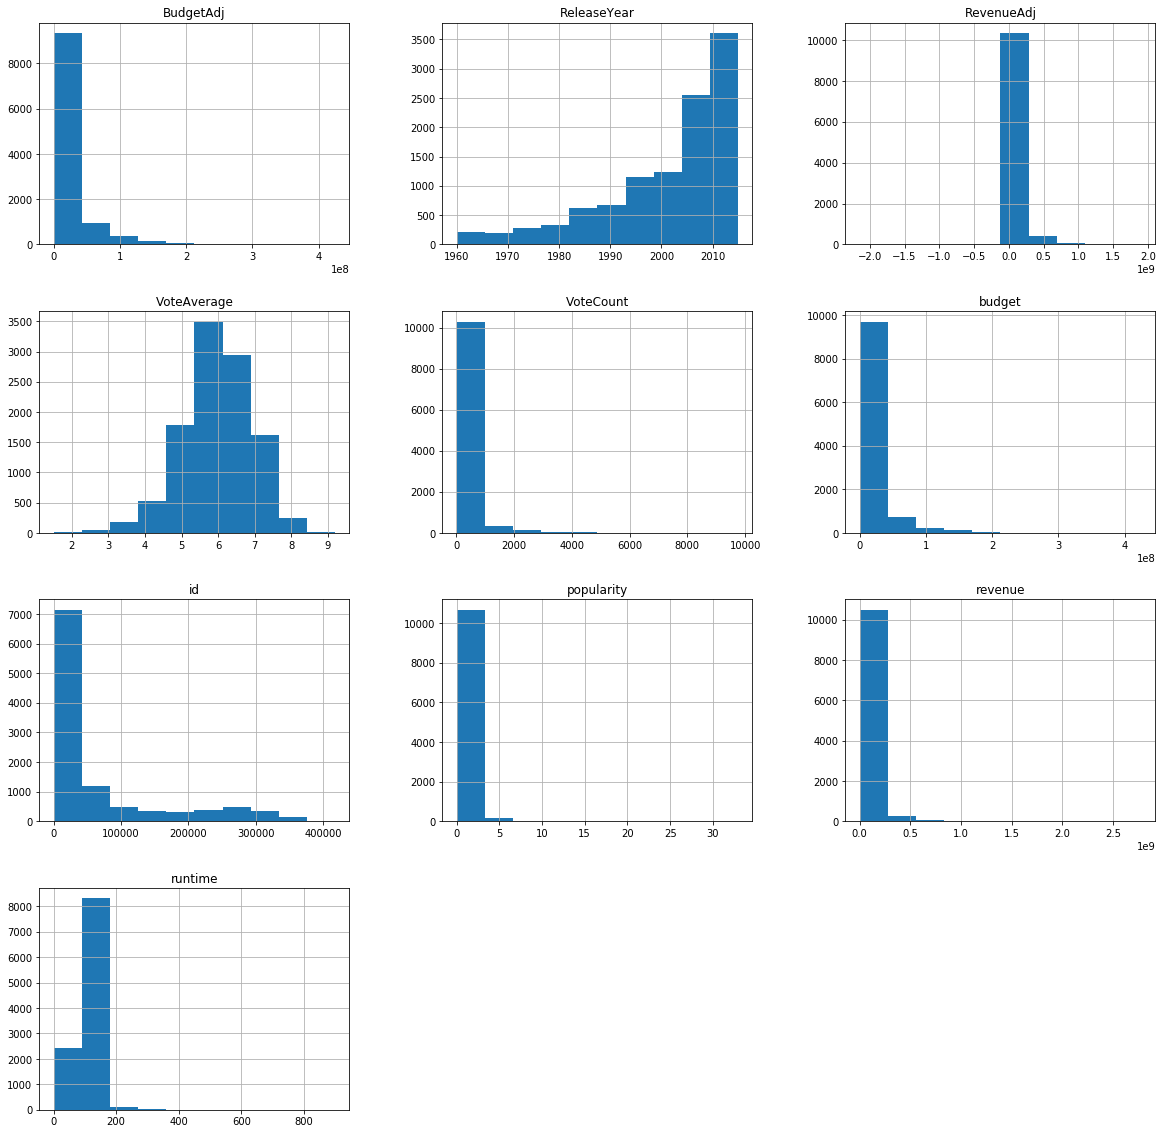

In [13]:
df.hist(figsize=(20,20))

After looking at the records now we will see how many movies has beed realesed everyyear. For that we will use group by function to determine number of movies released every year


### How many movie has been realesed every year?

In [14]:
#using group by function to find out number of movies per year 
df_year_movie_count=df.groupby(['ReleaseYear'],as_index=False)['id'].count()
df_year_movie_count

,ReleaseYear,id
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42
5,1965,35
6,1966,46
7,1967,40
8,1968,39
9,1969,31


In [15]:
# renaming a column so that it would be easier to understand. 
df_Total=df_year_total.rename(columns={'id':'TotalMovie'})

NameError: name 'df_year_total' is not defined

After grouping and renaming column. We need to visualize to see the trend also to visualize if the production of movie is changing every year.

In [ ]:
#creating a bar graph 
df_Total.plot.bar(x='ReleaseYear',y='TotalMovie',figsize=(20,20))
plt.title('Release year vs Total Movie Released per year')
plt.ylabel('Total number of Movie')
plt.show()


Lookin at the bar graph it is found out that number of movie production is increasing as time goes.But there is no any consistency of increasing production every year

In [ ]:
#Finding out the year which has max number of movie produced.
df_Total.max()

Looking the summary record, we know that most movies(700 movies) are produced on 2015

### Which movie has the highest and the lowest profit ?


In [ ]:
#Trying to find out the difference between total expenses and the income in order to determine highest and lowest earning movie
df['highestProfit']= df['revenue']-df['budget']
df.loc[df['highestProfit'] == df['highestProfit'].max()] 

In [ ]:
#trying to find out least profit movie
df.loc[df['highestProfit'] == df['highestProfit'].min()] 

Among the dataset , Highest earning movie is Avatr that has been released on 2009.
Also, lowest earning movie is The warrior's Way which has been released on 2010.

### Which movie has the highest and lowest popularity based on year?

In [25]:
def groupBYPop(c1):
    return df.groupby(c1)

In [26]:
#Trying to find out the highest and lowest popularity movive every year.
df_high_popularity=df.loc[groupBYPop('ReleaseYear')['popularity'].idxmax()]

In [27]:
df_high_popularity[['Title','ReleaseYear','popularity']]

,Title,ReleaseYear,popularity
10141,Psycho,1960,2.610362
10110,One Hundred and One Dalmatians,1961,2.631987
9849,Dr. No,1962,3.170651
10438,From Russia With Love,1963,2.508235
9881,Goldfinger,1964,3.153791
10689,Thunderball,1965,1.910465
10820,How the Grinch Stole Christmas!,1966,1.227582
10398,The Jungle Book,1967,2.550704
9719,2001: A Space Odyssey,1968,3.309196
10724,On Her Majesty's Secret Service,1969,1.778746


In [28]:
df_low_popularity=df.loc[groupBYPop('ReleaseYear')['popularity'].idxmin()]

In [29]:
df_low_popularity[['Title','ReleaseYear','popularity']]

,Title,ReleaseYear,popularity
10170,Cinderfella,1960,0.055821
10140,A Raisin in the Sun,1961,0.027527
9880,That Touch of Mink,1962,0.038819
10471,La frusta e il corpo,1963,0.045417
9922,Two Thousand Maniacs!,1964,0.008990
10723,"Die, Monster, Die!",1965,0.004770
10847,Island of Terror,1966,0.034555
10437,In Like Flint,1967,0.034181
9757,The Alphabet,1968,0.005265
10754,Bambi Meets Godzilla,1969,0.002757


Within the dataset, we try to find out the most popular and least popular movie based on the release year. 

## Which movie has the longest runtime?

In [ ]:
#determing the movie which has the longest runtime. 
df.loc[df['runtime'] == df['runtime'].max()] 

Inspecting the record, We found out that the movie called 'The Story of Flim : An odyssey' has longest run time i.e. 900 minute. It has been relase on 2011.

## Is movie industry becoming profitable everyyear? 

In [ ]:
#Finding out the pattern wether movie is being profitable over time ot not
df_profitable=df.groupby('ReleaseYear', as_index=False)['highestProfit'].mean()
df_profitable.plot.line(x='ReleaseYear',y='highestProfit',figsize=(20,20))
plt.title('Profitability based on year')
plt.ylabel('Profit')

Looking at the line chart, we can definetly say that profitability while making a movie is being increasing over a period of time. 

## Is rating of the movie increasing as per the time?

In [ ]:
#trying to determine if rating of the movie is increasing over period of time 
df_rating=df.groupby('ReleaseYear', as_index=False)['VoteAverage'].mean()
df_rating.plot.line(x='ReleaseYear',y='VoteAverage',figsize=(20,20))
plt.title('Rating of Movie per year')
plt.ylabel('Rating')

Looking at the line graph, we can definetly see that it is no downtrend. Therefore we can conclude that rating of the movie is decreasing over period of time

<a id='conclusions'></a>
## Conclusions

After performing detail analysis following thing has been concluded :
<ul>
    <li>Number of movie releasing every year is increasing. </li>
    <li>Avatar is the highest earning movie and The Warrior's Way is the lowest. </li>
    <li>Movie with the longest run time is 'The Story of Flim : An odyssey' </li>
    <li>Flim industry is becoming profitable over time</li>
    <li>Rating of the movie is decreasing over year.</li>
</ul>

## Limitation

<ul>
    <li> Budget and reveue doesn't have any currency symbol to represnt.</li>
    <li>Record consists of the null and missing values. </li>
    <li>Record consis of the wrong datatypes. </li>
 </ul>